### 00. Importando as biblíotecas necessárias.

In [868]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [869]:
df = pd.read_csv('Kaggle - Car Price.csv')

### 01. Entendendo o dataset.

In [870]:
df = df.drop(columns='Car ID')
df

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


**Verificando valores únicos no dataset**

In [871]:
df.nunique()

Brand              7
Year              24
Engine Size       51
Fuel Type          4
Transmission       2
Mileage         2490
Condition          3
Price           2499
Model             28
dtype: int64

**Verificando se há valores faltantes no dataset**

In [872]:
df.isnull().sum()

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

### 02. Analise univariada

**Analise as estatisticas descritivas do preço dos carros.**

In [873]:
price_table = pd.DataFrame(df.Price.describe())
price_table = price_table.round(2)
price_table

,Price
count,2500.00
mean,52638.02
std,27295.83
min,5011.27
25%,28908.48
50%,53485.24
75%,75838.53
max,99982.59


Boxplot para os preços dos carros.

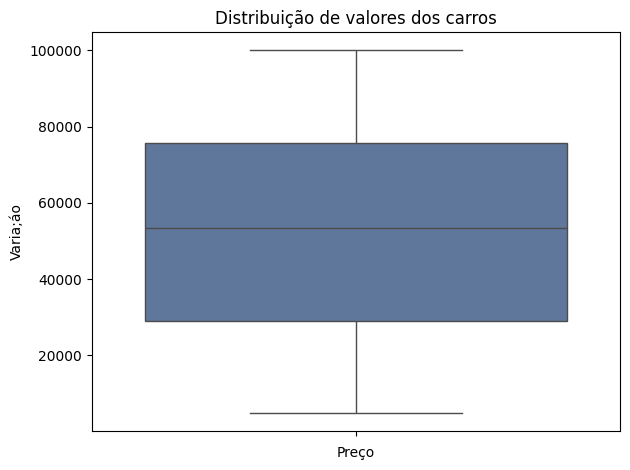

In [874]:
plt.Figure(figsize=(12, 8))
sns.set_color_codes('deep')
sns.boxplot(data=df, y='Price', color='b', saturation=0.60)
plt.title('Distribuição de valores dos carros')
plt.xlabel('Preço')
plt.ylabel('Varia;áo')
plt.tight_layout()

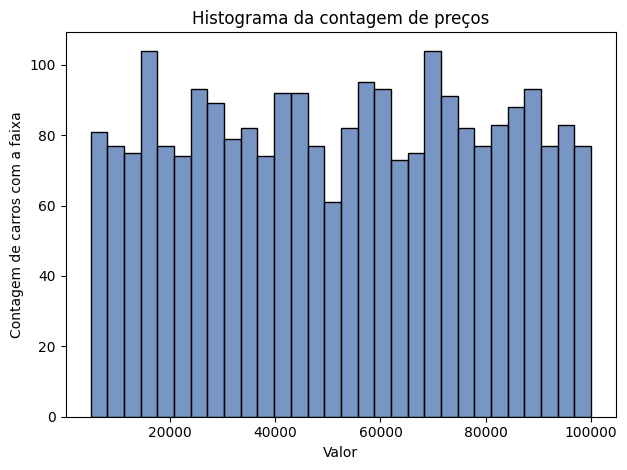

In [875]:
plt.Figure(figsize=(12, 8))
sns.histplot(df['Price'], bins=30, kde=False, color='b')
plt.xlabel('Valor')
plt.ylabel('Contagem de carros com a faixa')
plt.title('Histograma da contagem de preços')
plt.tight_layout()

**Tanto nos gráficos quanto na analise descritivas dos preços dos carros podemos ver que são bem distribuidos. Nenhum carro com um preço discrepante para que seja identificado como um outlier. Tendo como inicio preços que variam de 5 mil a 100 mil dolares (bigodes do gráfico), porem os preços se concentram entre 30 e aproximadamente 80 mil(parte preenchida do gráfico), sendo a mediana (linha do meio) 55 mil.**

Qual a proporção de carros para cada tipo de combustivel? E para as condições deles?

In [876]:
fuel_values = df['Fuel Type'].value_counts()
condition_values = df.Condition.value_counts()

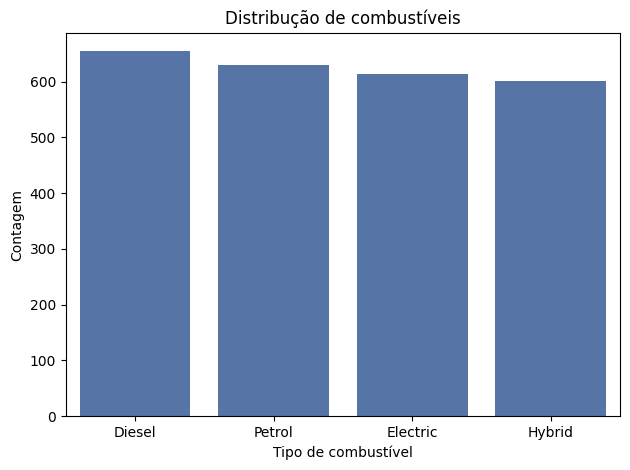

In [877]:
plt.Figure(figsize=(12, 8))
sns.barplot(x=fuel_values.index, y=fuel_values.values, color='b', saturation=0.80)
plt.xlabel('Tipo de combustível')
plt.ylabel('Contagem')
plt.title('Distribução de combustíveis')
plt.tight_layout()

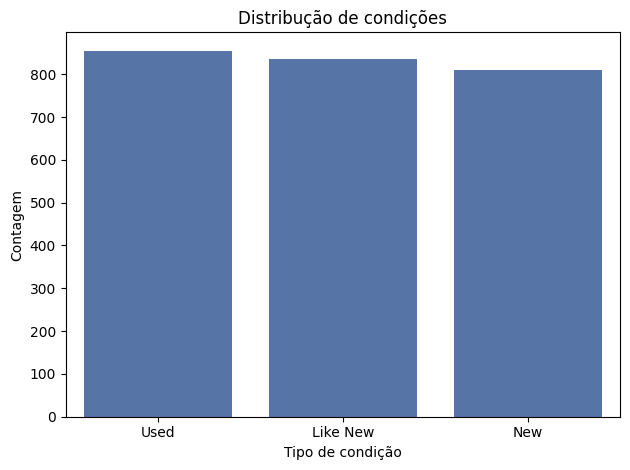

In [878]:
plt.Figure(figsize=(12, 8))
sns.barplot(x=condition_values.index, y=condition_values.values, color='b', saturation=0.80)
plt.xlabel('Tipo de condição')
plt.ylabel('Contagem')
plt.title('Distribução de condições')
plt.tight_layout()

**As distribuições de condição e combustiveis são bem homogeneas.**

Quais são as 5 marcas mais comuns presentes nos dados?

In [879]:
brand_values = df.Brand.value_counts().head(5)
brand_values

Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Name: count, dtype: int64

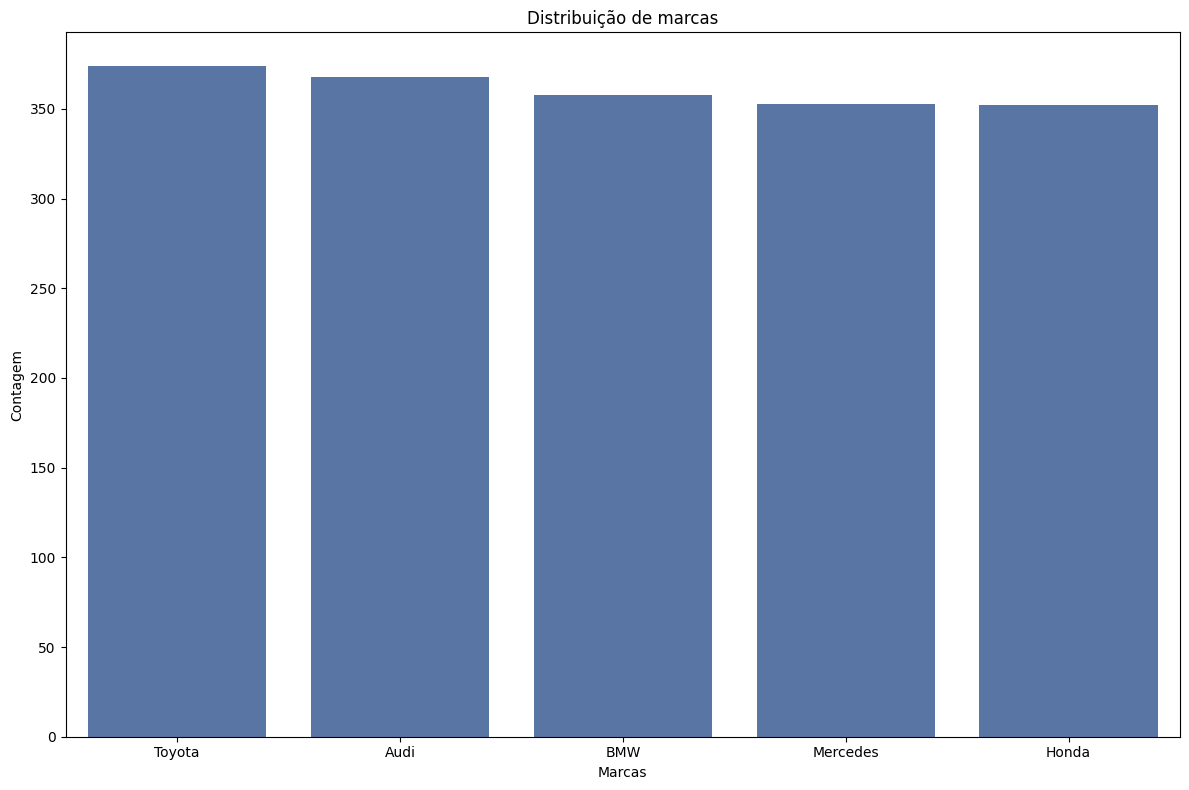

In [880]:
plt.figure(figsize=(12, 8))
sns.barplot(x=brand_values.index, y=brand_values.values, color='b')
plt.title('Distribuição de marcas')
plt.xlabel('Marcas')
plt.ylabel('Contagem')
plt.tight_layout()

### 03. Analise bivariada

Existe alguma relação entre o ano do carro e o preço?

In [881]:
# filtranso as váriaveis alvo
dfcorre1 = df[['Year', 'Price']]

In [882]:
correlation_matrix_1 = dfcorre1.corr()
correlation_matrix_1

,Year,Price
Year,1.000000,-0.036805
Price,-0.036805,1.000000


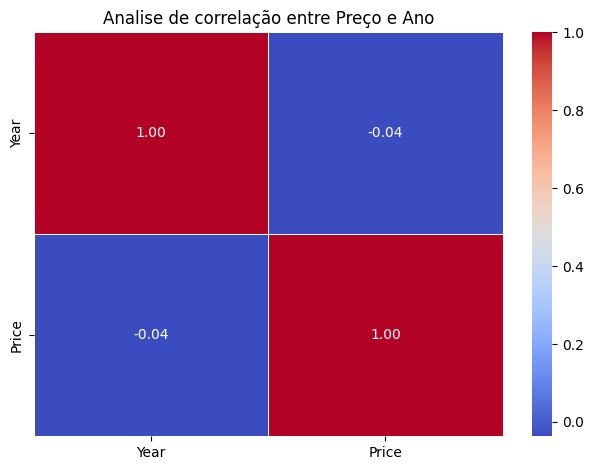

In [883]:
plt.Figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix_1, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, robust=True)
plt.title('Analise de correlação entre Preço e Ano')
plt.tight_layout()

No gráfico de calor é indicado uma leve correlação negativa. Isso indica que **o ano não é uma variável que influencia tanto assim no preço do carro (tanto para o aumento como também na baixa de preço)**

Distribuição usando lineplot (gráfico de linha) que representa os valores para cada ano.

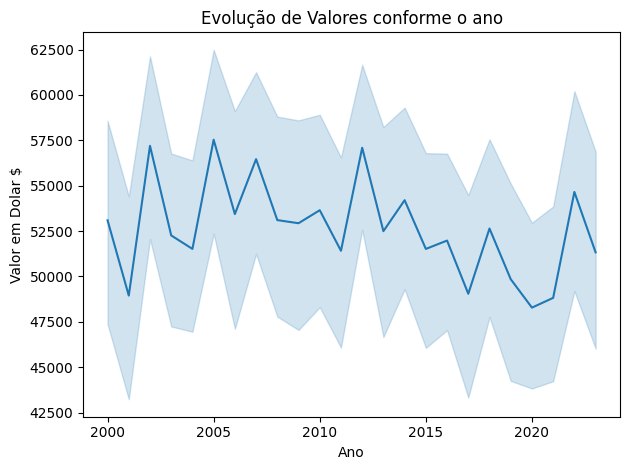

In [884]:
plt.Figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Price')
plt.title('Evolução de Valores conforme o ano')
plt.xlabel('Ano')
plt.ylabel('Valor em Dolar $')
plt.tight_layout()

In [885]:
mean_price_byyear = df.groupby('Year')['Price'].mean()

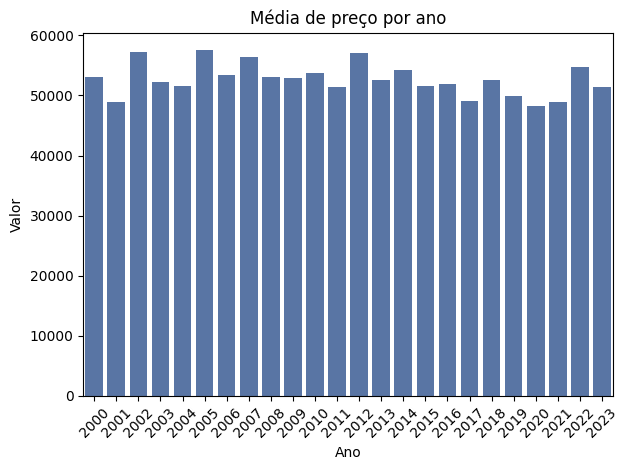

In [886]:
plt.Figure(figsize=(12, 8))
sns.barplot(x=mean_price_byyear.index, y=mean_price_byyear.values, color='b')
plt.title('Média de preço por ano')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.tight_layout()

No gráfico de linhas é notado uma distribuição considerável de variação de preços entre os anos. Porem esse gráfico não está com uma base de y 0, o que significa que não temos a proporção correta dos dados nesse gráfico. <br><br>**Quando olhamos o histograma, podemos ver que os valores se matem quase sem uma alta ou baixa significativa.** <br><br>Porem alguns fatores podem determinar isso. <br> 

**01.Inflação:** A inflação constante tende a aumentar o preço médio dos carros ao longo dos anos. Mesmo que o preço nominal aumente, isso pode não refletir uma alta real no valor.

**02.Avanço tecnológico:** Carros com mais tecnologia e funcionalidades tendem a custar mais, mas esses avanços muitas vezes são compensados por reduções de custo na fabricação em massa.

**03.Concorrência:** A competição entre fabricantes pode segurar aumentos excessivos nos preços, mesmo em cenários de alta demanda.


Distancia dos valores médios para cada condição e comente o que você encontrou.

In [887]:
mean_price_by_condition = df.groupby('Condition')['Price'].mean()
mean_price_by_condition = pd.DataFrame(mean_price_by_condition).reset_index().round(2)
mean_price_by_condition

,Condition,Price
0,Like New,53518.75
1,New,51904.51
2,Used,52470.92


Segundo os dados, os carros Novos são ligeiramente mais baratos que os carros Seminovos. **O que é contraintuitivo,** mas isso pode acontecer por alguns motivos: <br><br> 1) Os carros seminovos podem ser de fabricantes mais caras. <br> 2) Pode haver alguma modificação ou acessórios que elevem o custo do carro. <br>3) Pode serque a diferença na média exista, mas seja meramente resultado do acaso e que os valores sejam simplismente muito próximos.

Qual a média de quilometragem por condição? Quais as marcas presentes para cada condição existente em nosso conjunto de dados.

In [888]:
mean_ml_by_cond = df.groupby('Condition')['Mileage'].mean()
mean_ml_by_cond = pd.DataFrame(mean_ml_by_cond).round(2)
mean_ml_by_cond

,Mileage
Condition,
Like New,151986.43
New,148667.97
Used,148586.63


In [889]:
cross_brand_cond = pd.crosstab(df['Brand'], df['Condition'])
cross_brand_cond

Condition,Like New,New,Used
Brand,,,
Audi,111,129,128
BMW,138,104,116
Ford,124,113,110
Honda,123,109,120
Mercedes,110,115,128
Tesla,121,119,108
Toyota,109,120,145


In [890]:
cross_brand_cond = cross_brand_cond.apply(lambda x: x/x.sum(), axis=1) * 100
cross_brand_cond = cross_brand_cond.round(2)
cross_brand_cond

Condition,Like New,New,Used
Brand,,,
Audi,30.16,35.05,34.78
BMW,38.55,29.05,32.40
Ford,35.73,32.56,31.70
Honda,34.94,30.97,34.09
Mercedes,31.16,32.58,36.26
Tesla,34.77,34.20,31.03
Toyota,29.14,32.09,38.77


1. **Tendências Gerais**:
   - **Veículos "Like New"**: Marcas como BMW, Ford, Honda e Tesla têm uma alta porcentagem de veículos na condição "Like New", sugerindo que esses veículos são bem mantidos ou têm uma alta taxa de revenda em boas condições.
   - **Veículos "New"**: Audi e Tesla têm uma alta porcentagem de veículos novos, indicando uma forte presença de veículos recém-adquiridos no mercado.
   - **Veículos "Used"**: Mercedes e Toyota têm uma alta porcentagem de veículos usados, o que pode indicar uma maior durabilidade ou uma maior aceitação de veículos usados entre os consumidores dessas marcas.

2. **Recomendações para Estratégias de Marketing**:
   - **Audi e Tesla**: Focar em campanhas que destacam a disponibilidade de veículos novos, aproveitando a alta porcentagem de veículos novos nessas marcas.
   - **BMW, Ford, Honda e Tesla**: Promover a qualidade e a manutenção dos veículos "Like New", destacando a boa condição dos veículos disponíveis.
   - **Mercedes e Toyota**: Enfatizar a durabilidade e a confiabilidade dos veículos usados, aproveitando a alta porcentagem de veículos usados nessas marcas.

quantidade de carros para cada condição.

In [891]:
grouped = df.groupby(['Year', 'Condition']).size().unstack(fill_value=0)
years = grouped.index
new = grouped.get('New', 0)
like_new = grouped.get('Like New',0)
used = grouped.get('Used', 0)

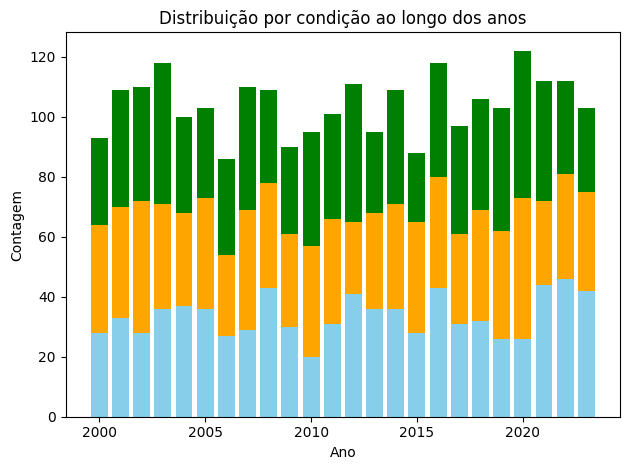

In [892]:
plt.Figure(figsize=(12, 8))
plt.bar(years, new, label='Novo', color='skyblue')
plt.bar(years, like_new, bottom=new, label='Seminovo', color='orange')
plt.bar(years, used, bottom=new + like_new, label='Seminovo', color='green')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Distribuição por condição ao longo dos anos')
plt.tight_layout()

**Observa-se que a quantidade total de veículos por ano é relativamente estável, mas há variações nas proporções entre as condições. Isso pode refletir mudanças no mercado, como aumento ou queda na demanda por carros novos ou usados em diferentes períodos.**

Treemap (visualização hierárquica) da condição, tipo de combustivel e transmissão dos veiculos.

In [893]:
grouped_df_9 = df.groupby(['Condition', 'Fuel Type', 'Transmission']).size().reset_index(name='Count')
grouped_df_9 = grouped_df_9.sort_values(['Condition', 'Fuel Type', 'Transmission'])

In [894]:
import plotly.express as px
# Create treemap
fig = px.treemap(grouped_df_9, 
                 path=[px.Constant("Total"), 'Condition', 'Fuel Type', 'Transmission'],
                 values='Count',
                 color='Count',
                 color_continuous_scale='Viridis',
                 title='Treemap de Tipos de Combustível e Transmissão por Condição')

fig.update_layout(
    width=800,
    height=600,
    title_x=0.5,
    title_font_size=18
)

- "Diesel" e "Petrol" predominam em várias condições, enquanto "Electric" e "Hybrid" aparecem mais em "New" ou "Like New".
- A transmissão "Automatic" é amplamente utilizada em todas as categorias de combustível, indicando uma possível preferência do mercado.
- A intensidade da cor reflete a contagem, com "Diesel Automatic" e "Petrol Automatic" tendo maior frequência.

Evolução do preço médio dos carros pelo tipo de comsbustível.

In [895]:
grouped_df_10 = df.groupby(['Year', 'Fuel Type'])['Price'].mean().reset_index()
grouped_df_10 = grouped_df_10.sort_values(['Year', 'Fuel Type', 'Price'])
grouped_df_10

,Year,Fuel Type,Price
0,2000,Diesel,67016.690400
1,2000,Electric,43899.120417
2,2000,Hybrid,47921.274583
3,2000,Petrol,52932.523000
4,2001,Diesel,49576.259643
...,...,...,...
91,2022,Petrol,58051.187000
92,2023,Diesel,55058.596429
93,2023,Electric,49867.628571
94,2023,Hybrid,51093.042414


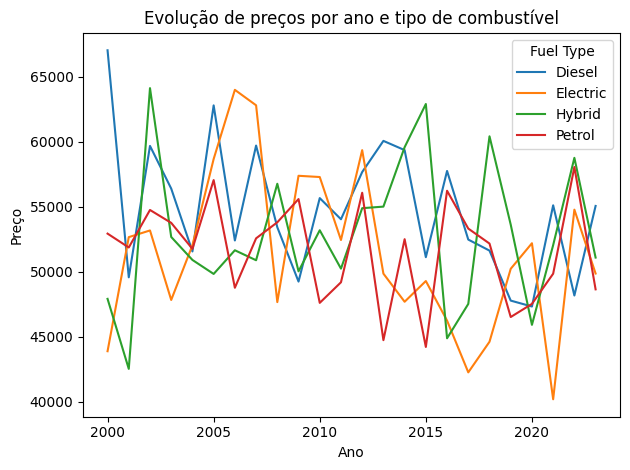

In [896]:
plt.Figure(figsize=(20, 12))
sns.lineplot(data=grouped_df_10, x='Year', y='Price', hue='Fuel Type', errorbar=None)
plt.title('Evolução de preços por ano e tipo de combustível')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.tight_layout()

Observa-se uma alta variação nos preços dos carros em todos os tipos de combustível, sem uma tendência clara de aumento ou redução consistente ao longo do tempo. Isso pode indicar flutuações influenciadas por fatores como demanda, inovação tecnológica e mudanças no mercado ou políticas ambientais.

**Porem, assim como no inicio desse notebook é observado que o eixo y desse gráfico não tem uma base zero, então podemos concluir que a variancia não é tão alta assim. Visto que o gráfico começa do valor de 40 mil e vai um pouco mais de 65 mil.**

### 04. Teste de hipoteses

a diferença dos preços dos carros por condição é significativa ou mera obra do acaso?

In [897]:
import scipy.stats as stats

groups = [df[df['Condition'] == cond]['Price'] for cond in df['Condition'].unique()]
f_statistic, p_value = stats.f_oneway(*groups)

print('Resultado ANOVA:')
print(f'F-Statistic: {f_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

Resultado ANOVA:
F-Statistic: 0.7431
P-Value: 0.4757


O resultado da ANOVA (Análise de Variância) que eu obteve indica o seguinte:

- **F-Statistic: 0.7431**: Este valor é a razão entre a variância entre os grupos e a variância dentro dos grupos. Um valor mais alto geralmente indica que há uma diferença significativa entre os grupos.
- **P-Value: 0.4757**: Este valor indica a probabilidade de obter um resultado tão extremo quanto o observado, assumindo que a hipótese nula é verdadeira. Um valor de p maior que 0.05 geralmente sugere que não há evidência suficiente para rejeitar a hipótese nula.

Portanto, com um p-value de 0.4757, você não tem evidência estatística suficiente para concluir que há uma diferença significativa entre os grupos analisados. Em outras palavras, as diferenças observadas entre os grupos podem ser devidas ao acaso.

### 05. Construção de um modelo (falho) de machine learning

In [898]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [899]:
class CarPricePredictionModel:
    def __init__(self, data):
        self.data = pd.DataFrame(data)
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.model = None
        
    def preprocess_data(self):
        # Codificação de variáveis categóricas
        categorical_columns = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
        
        for col in categorical_columns:
            le = LabelEncoder()
            self.data[col] = le.fit_transform(self.data[col])
            self.label_encoders[col] = le
        
        # Separação de features e target
        X = self.data.drop('Price', axis=1)
        y = self.data['Price']
        
        # Divisão dos dados de treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Padronização das features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def train_model(self, algorithm='linear_regression'):
        X_train, X_test, y_train, y_test = self.preprocess_data()
        
        # Dicionário de algoritmos
        algorithms = {
            'linear_regression': LinearRegression(),
            'ridge_regression': Ridge(alpha=1.0),
            'lasso_regression': Lasso(alpha=1.0),
            'decision_tree': DecisionTreeRegressor(random_state=42),
            'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'gradient_boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'support_vector_regression': SVR(kernel='rbf')
        }
        
        # Treinar modelo
        self.model = algorithms.get(algorithm)
        self.model.fit(X_train, y_train)
        
        # Avaliar modelo
        y_pred = self.model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Cross-validation
        cv_scores = cross_val_score(self.model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        
        print(f"Algoritmo: {algorithm}")
        print(f"Erro Quadrático Médio: {mse:.2f}")
        print(f"Coeficiente de Determinação (R²): {r2:.2f}")
        print(f"Cross-Validation MSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
        
        return self.model
    
    def predict_car_price(self, new_car_data):
        # Preparar dados do novo carro
        new_car_df = pd.DataFrame([new_car_data])
        
        # Aplicar label encoding
        categorical_columns = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
        for col in categorical_columns:
            new_car_df[col] = self.label_encoders[col].transform(new_car_df[col])
        
        # Padronizar dados
        new_car_scaled = self.scaler.transform(new_car_df)
        
        # Prever preço
        predicted_price = self.model.predict(new_car_scaled)
        return predicted_price[0]

In [900]:
car_model = CarPricePredictionModel(df)

In [901]:
# Testar diferentes algoritmos
algorithms_to_test = [
    'linear_regression', 
    'ridge_regression', 
    'lasso_regression', 
    'decision_tree', 
    'random_forest', 
    'gradient_boosting', 
    'support_vector_regression'
]

In [902]:
for algo in algorithms_to_test:
    print("\n" + "="*50)
    car_model.train_model(algo)


Algoritmo: linear_regression
Erro Quadrático Médio: 759016533.57
Coeficiente de Determinação (R²): -0.00
Cross-Validation MSE: 746756928.61 (+/- 53588809.14)

Algoritmo: ridge_regression
Erro Quadrático Médio: 759014942.20
Coeficiente de Determinação (R²): -0.00
Cross-Validation MSE: 746751913.83 (+/- 53586629.53)

Algoritmo: lasso_regression
Erro Quadrático Médio: 759012489.74
Coeficiente de Determinação (R²): -0.00
Cross-Validation MSE: 746747485.10 (+/- 53582262.82)

Algoritmo: decision_tree
Erro Quadrático Médio: 1436456175.76
Coeficiente de Determinação (R²): -0.90
Cross-Validation MSE: 1473948218.70 (+/- 107042018.66)

Algoritmo: random_forest
Erro Quadrático Médio: 799524341.08
Coeficiente de Determinação (R²): -0.06
Cross-Validation MSE: 782354385.80 (+/- 89234889.39)

Algoritmo: gradient_boosting
Erro Quadrático Médio: 770497442.17
Coeficiente de Determinação (R²): -0.02
Cross-Validation MSE: 780292698.15 (+/- 79201514.48)

Algoritmo: support_vector_regression
Erro Quadrático

### Análise dos Resultados

**Problemas Fundamentais:**

- R² próximo de zero ou negativo
- Erro Quadrático Médio extremamente alto
- Resultados consistentemente ruins em todos os algoritmos

**Causas Prováveis:**

- Dataset extremamente pequeno e inconsistente
- Features não representativas do preço do carro
- Grande variabilidade nos dados
- Possível erro na preparação/codificação dos dados

**Recomendações:**

- Aumentar significativamente o tamanho do dataset
- Verificar a qualidade e relevância das features
- Realizar uma análise exploratória dos dados
- Investigar a distribuição dos preços
- Checar se há outliers extremos
- Considerar feature engineering